# 테스트 1-5 6
# 2-6 7
# 3-7 8

1. 분류로 시작에 이점 : 구매감소을 예측 을 2분활로 분류가가능
  분류로 결과를 보는게 더나을것같다고 판단
  이유는 감소한 사람을 공략하기위함이니 감소를 예측하기위해서
2. 회귀로 시작에 이점 : 구매감소율을 예측을하여(1 ~ -1)로 감소하는 사람의 감소예측
    율을 예측할수 있다

In [1]:
import pandas as pd
df = pd.read_excel('demo15_최종.xlsx')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트 경로 지정
font_prop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=font_prop.get_name())

In [3]:
df.fillna(0, inplace=True) # 널값을 모두 0 으로

In [4]:
df_encoded = pd.get_dummies(df[['연령대', '거주지역']])
df = pd.concat([df, df_encoded], axis=1)

# 연령대와 거주지역은 정보가 많아서 원핫으로 중요도를 볼려고함
# 원핫으로 보고 중요도를 보겟음

In [5]:
# 이분활인것은 요런식으로~
#성별 F가 더 더 벌어주니까 1로 만들어놈, 멤버십 X 도 같은거

df['성별'] = df['성별'].apply(lambda x: 1 if x == 'F' else 0)
df['멤버십'] = df['멤버십'].apply(lambda x: 1 if x == 'X' else 0)
df['고객유형'] = df['고객유형'].apply(lambda x: 1 if x == '충성고객' else 0)



In [6]:
df = df.drop(columns=['연령대', '거주지역'])


In [7]:
df.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,총구매금액,target_15,target_26,target_37,target_48,...,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,1,0,1,1,15.0,85042550,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,1,1,8.0,99880760,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,1,0.0,3165167,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,1,3.0,16693810,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,1,0,0.0,13237070,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [8]:
df.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,총구매금액,target_15,target_26,target_37,target_48,...,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,1,0,1,1,15.0,85042550,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,1,1,8.0,99880760,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,1,0.0,3165167,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,1,3.0,16693810,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,1,0,0.0,13237070,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [19]:
df.columns[0:100]

Index(['고객번호', '성별', '연령대', '거주지역', '멤버십', '고객유형', '경쟁사횟수', '총구매금액',
       'target_15', 'target_26', 'target_37', 'target_48', '계절총액_15',
       '계절총액_26', '계절총액_37', '계절총액_48', '등급_15', '등급_26', '등급_37', '등급_48',
       '등급_6', '등급_7', '등급_8', '월평균액_15', '월평균액_26', '월평균액_37', '월평균액_6',
       '월평균액_7', '월평균액_8', '평균구매품목수15', '평균구매품목수26', '평균구매품목수37', '평균구매품목수6',
       '평균구매품목수7', '평균구매품목수8', '총방문횟수15', '총방문횟수26', '총방문횟수37', '총방문횟수48',
       '주말비율15', '주말비율26', '주말비율37', '주말비율6', '주말비율7', '주말비율8', '심야비율_15',
       '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', '심야비율_26', '오전비율_26',
       '오후비율_26', '저녁비율_26', '새벽비율_26', '심야비율_37', '오전비율_37', '오후비율_37',
       '저녁비율_37', '새벽비율_37', '심야비율_6', '오전비율_6', '오후비율_6', '저녁비율_6', '새벽비율_6',
       '심야비율_7', '오전비율_7', '오후비율_7', '저녁비율_7', '새벽비율_7', '심야비율_8', '오전비율_8',
       '오후비율_8', '저녁비율_8', '새벽비율_8', '0_누적_15', '0_절대_15', '0_누적_26',
       '0_절대_26', '0_누적_37', '0_절대_37', '0_누적_48', '0_절대_48', '1_누적_15',
       '1_절대_15', '1_누적_26', '1_절대_26'

In [25]:
df2 = df[['고객번호', '성별','멤버십', '고객유형', '경쟁사횟수', 
       'target_15','계절총액_15', '등급_15',  '평균구매품목수15', '총방문횟수15','오전비율_15', 
        '오후비율_15', '저녁비율_15', '새벽비율_15','0_누적_15', '0_절대_15','1_누적_15', '1_절대_15','2_누적_15', '2_절대_15',
        '3_누적_15', '3_절대_15','4_누적_15', '4_절대_15','5_누적_15', '5_절대_15','6_누적_15', '6_절대_15',
        '7_누적_15', '7_절대_15','8_누적_15', '8_절대_15','9_누적_15', '9_절대_15','10_누적_15', '10_절대_15',
        '11_누적_15', '11_절대_15','12_누적_15', '12_절대_15','13_누적_15', '13_절대_15','연령대_청년층', '연령대_학생층',
         '연령대_노년층','연령대_중년층','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북',]].copy()


In [10]:
df3= df[['target_26']].copy()

In [26]:
df4 = df[['고객번호', '성별','멤버십', '고객유형', '경쟁사횟수', 
       'target_26','계절총액_26', '등급_26',  '평균구매품목수26', '총방문횟수26','오전비율_26', 
        '오후비율_26', '저녁비율_26', '새벽비율_26','0_누적_26', '0_절대_26','1_누적_26', '1_절대_26','2_누적_26', '2_절대_26',
        '3_누적_26', '3_절대_26','4_누적_26', '4_절대_26','5_누적_26', '5_절대_26','6_누적_26', '6_절대_26',
        '7_누적_26', '7_절대_26','8_누적_26', '8_절대_26','9_누적_26', '9_절대_26','10_누적_26', '10_절대_26',
        '11_누적_26', '11_절대_26','12_누적_26', '12_절대_26','13_누적_26', '13_절대_26','연령대_청년층', '연령대_학생층',
         '연령대_노년층','연령대_중년층','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북',]].copy()

In [12]:
df5= df[['target_37']].copy()

In [24]:
high_corr = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix < 1)]
print(high_corr)


           고객번호  경쟁사횟수     총구매금액  target_15  target_26  target_37  target_48  \
고객번호        NaN    NaN       NaN        NaN        NaN        NaN        NaN   
경쟁사횟수       NaN    NaN       NaN        NaN        NaN        NaN        NaN   
총구매금액       NaN    NaN       NaN        NaN        NaN        NaN        NaN   
target_15   NaN    NaN       NaN        NaN        NaN        NaN        NaN   
target_26   NaN    NaN       NaN        NaN        NaN        NaN        NaN   
target_37   NaN    NaN       NaN        NaN        NaN        NaN        NaN   
target_48   NaN    NaN       NaN        NaN        NaN        NaN        NaN   
계절총액_15     NaN    NaN  0.941162        NaN        NaN        NaN        NaN   
계절총액_26     NaN    NaN  0.967884        NaN        NaN        NaN        NaN   
계절총액_37     NaN    NaN  0.965566        NaN        NaN        NaN        NaN   
계절총액_48     NaN    NaN  0.937465        NaN        NaN        NaN        NaN   
등급_15       NaN    NaN       NaN        

In [23]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(corr_matrix)

               고객번호     경쟁사횟수     총구매금액  target_15  target_26  target_37  \
고객번호       1.000000 -0.005038 -0.147107   0.056052   0.041147   0.039660   
경쟁사횟수     -0.005038  1.000000  0.017715  -0.010282  -0.027116  -0.032393   
총구매금액     -0.147107  0.017715  1.000000  -0.019159  -0.036019  -0.035721   
target_15  0.056052 -0.010282 -0.019159   1.000000   0.200921   0.113586   
target_26  0.041147 -0.027116 -0.036019   0.200921   1.000000   0.214227   
target_37  0.039660 -0.032393 -0.035721   0.113586   0.214227   1.000000   
target_48  0.008485 -0.012804  0.004588   0.031095   0.118223   0.203355   
계절총액_15   -0.144225  0.021307  0.941162  -0.037126  -0.083130  -0.082857   
계절총액_26   -0.144046  0.015398  0.967884   0.002716  -0.043352  -0.069794   
계절총액_37   -0.141043  0.011948  0.965566   0.020926  -0.001112  -0.028918   
계절총액_48   -0.128769  0.007368  0.937465   0.024477   0.013795   0.008893   
등급_15     -0.285907  0.065537  0.468786  -0.084365  -0.148345  -0.152857   
등급_26     -0

In [ ]:
df2

In [ ]:
df_concatenated = df_concatenated[['연령대', '거주지역', '성별_F', '성별_M']].drop(['연령대', '거주지역', '성별_F', '성별_M'], axis=1)

In [82]:
df6 = df[['고객번호', '성별','멤버십', '고객유형', '경쟁사횟수', 
       'target_37','계절총액_37', '등급_37', '평균구매품목수37', '총방문횟수37','오전비율_37', 
        '오후비율_37', '저녁비율_37', '새벽비율_37','0_누적_37', '0_절대_37','1_누적_37', '1_절대_37','2_누적_37', '2_절대_37',
        '3_누적_37', '3_절대_37','4_누적_37', '4_절대_37','5_누적_37', '5_절대_37','6_누적_37', '6_절대_37',
        '7_누적_37', '7_절대_37','8_누적_37', '8_절대_37','9_누적_37', '9_절대_37','10_누적_37', '10_절대_37',
        '11_누적_37', '11_절대_37','12_누적_37', '12_절대_37','13_누적_37', '13_절대_37','연령대_청년층', '연령대_학생층',
         '연령대_노년층','연령대_중년층','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북',
       '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산','거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산',
       '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북',]].copy()

In [83]:
df7= df[['target_48']].copy()

In [92]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:thresholds_boundary],linestyle = '--' , label = 'precision')
    plt.plot(thresholds , recalls[0:threshold_boundary],label = 'recall')
    
    start , end = plt. xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1),2))
    
    plt.xlabel('Thresholds value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

    


    precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=200)
lr_clf.fit(X_train_scaled, y_train)

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
for threshold in thresholds:
    binarized_pred = (pred_proba[:, 1] >= threshold).astype(int)
    get_clf_eval(y_test, binarized_pred)


C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

오차행렬
[[ 8532     0]
 [10851     0]]
정확도: 0.4402, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
오차행렬
[[ 8532     0]
 [10851     0]]
정확도: 0.4402, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
오차행렬
[[ 8532     0]
 [10851     0]]
정확도: 0.4402, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
오차행렬
[[ 8532     0]
 [10851     0]]
정확도: 0.4402, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000
오차행렬
[[ 8532     0]
 [10851     0]]
정확도: 0.4402, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000


C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# s.s(표준편차)를쓰면 그이후에 테스트 데이터도 무조건 해줘야함 오차를 줄이기위해


train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)


(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee


(2) Return

X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

머신러닝 모델의 하이퍼파라미터 튜닝 시 특히 n_estimators의 값은 validation 셋의 오차율을 점검해 나가면서 튜닝을 진행해야 하며, 딥러닝 모델도 마찬가지로 validation_data를 지정해 줌으로써 매 epoch 마다 validation의 오차율을 확인하면서 과적합을 방지해야 좋은 성능의 모델을 만들 수 있습니다.

# 소비재,임의코드분류, 

In [67]:
df2.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,target_15,계절총액_15,등급_15,평균구매품목수15,총방문횟수15,...,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,1,0,1,1,15.0,1,6.309726e+07,5,1.57,489.0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,1,1,8.0,1,6.526469e+07,5,1.68,450.0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,1,0.0,1,2.185141e+06,1,2.48,333.0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,1,3.0,1,1.109015e+07,3,1.83,308.0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,1,0,0.0,0,9.912117e+06,3,1.69,356.0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
df4.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,target_26,계절총액_26,등급_26,평균구매품목수26,총방문횟수26,...,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,1,0,1,1,15.0,0,6.250124e+07,5,1.62,486.0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,1,1,8.0,1,6.035115e+07,5,1.64,418.0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,1,0.0,0,2.193845e+06,1,2.46,334.0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,1,3.0,0,1.169704e+07,3,1.85,331.0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,1,0,0.0,0,7.547575e+06,2,1.70,262.0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
df3.head()

,target_26
0,0
1,1
2,0
3,0
4,0


In [22]:
df5.head()

,target_37
0,0
1,1
2,0
3,0
4,0


In [6]:
# corr확인용으로 일단 봄
# 여기서 너무 지수가 크게나오면 그전에 ss박고 시작


In [ ]:
# 여기전에 원핫 인코딩 , 레이블인코딩?이 없이 오는게 제일베스트 


In [69]:
dataset =  df2.copy() # 1-5분기 
dataset2 = df3.copy() # 6분기
dataset3 = df4.copy() # 2-6분기
dataset4 = df5.copy() # 7분기



In [89]:
dataset5 = df6.copy() # 3-7분기
dataset6 = df7.copy() # 8분기

In [70]:
X_train = dataset

y_train = dataset2

X_validation = dataset3

y_validation = dataset4

In [90]:

X_test = dataset5

y_test = dataset6


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=200)
logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation_scaled, y_validation)




C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0_누적_26
- 0_절대_26
- 10_누적_26
- 10_절대_26
- 11_누적_26
- ...
Feature names seen at fit time, yet now missing:
- 0_누적_15
- 0_절대_15
- 10_누적_15
- 10_절대_15
- 11_누적_15
- ...

  warnings.warn(message, FutureWarning)
C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print("X_train 열 개수:", X_train.shape[1])
print("X_validation 열 개수:", X_validation.shape[1])


X_train 열 개수: 63
X_validation 열 개수: 64


In [72]:
# 검증 데이터셋에 대한 예측 확률 평가
validation_proba = logreg.predict_proba(X_validation_scaled)

# 첫 번째 데이터 포인트의 예측 확률 출력
print(validation_proba[0])
# 0이 될확률 0.77 1이 될 확률 0.22

# 예측 확률을 사용하여 예측 클래스 출력

predicted_class = logreg.predict(X_validation_scaled)
print(predicted_class[0])
# 0으로 예측 

[0.6293687 0.3706313]
0


In [73]:
print("Validation Accuracy:", validation_accuracy)


Validation Accuracy: 0.6555228808749936


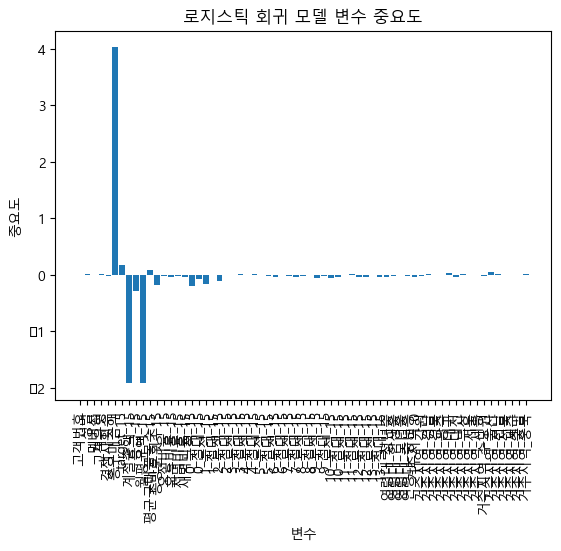

In [28]:
import matplotlib.pyplot as plt

# 변수 중요도 추출
importance = logreg.coef_[0]

# 변수 중요도 시각화
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical')
plt.xlabel('변수')
plt.ylabel('중요도')
plt.title('로지스틱 회귀 모델 변수 중요도')
plt.show()


In [80]:
import matplotlib.pyplot as plt

# 변수 중요도 추출
importance = logreg.coef_[0]

# 변수 중요도 시각화
plt.figure(figsize=(100, 100)) 
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), X_train.columns)
plt.xlabel('중요도')
plt.ylabel('변수')
plt.title('로지스틱 회귀 모델 변수 중요도')

# 글자 크기 및 막대 길이 조정
plt.rcParams.update({'font.size': 100})
plt.subplots_adjust(left=0.2)

plt.show()


KeyboardInterrupt: 

In [81]:
import matplotlib.pyplot as plt

# 변수 중요도 추출
importance = logreg.coef_[0]

# 변수 중요도 시각화
plt.figure(figsize=(100, 100)) 
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), X_train.columns)
plt.xlabel('중요도')
plt.ylabel('변수')
plt.title('로지스틱 회귀 모델 변수 중요도')

# 글자 크기 및 막대 길이 조정
plt.rcParams.update({'font.size': 3})
plt.subplots_adjust(left=0.2)

plt.show()

# 중요도를 하나씩 출력
for i, imp in enumerate(importance):
    print(f"변수 {X_train.columns[i]}의 중요도: {imp}")


변수 고객번호의 중요도: -0.02046299886048338
변수 성별의 중요도: 0.013006038305333976
변수 멤버십의 중요도: -0.0002836206145421972
변수 고객유형의 중요도: 0.03475607727437437
변수 경쟁사횟수의 중요도: -0.02465990532737606
변수 target_15의 중요도: 0.19401281893888428
변수 계절총액_15의 중요도: -0.03687728290553141
변수 등급_15의 중요도: -0.188229342044958
변수 평균구매품목수15의 중요도: 0.05096572099574849
변수 총방문횟수15의 중요도: -0.24696159162218523
변수 오전비율_15의 중요도: -0.014442295174819625
변수 오후비율_15의 중요도: -0.028512562322373345
변수 저녁비율_15의 중요도: -0.013955122605812342
변수 새벽비율_15의 중요도: -0.03554196250947982
변수 0_누적_15의 중요도: -0.19317366476829198
변수 0_절대_15의 중요도: -0.07506675302945191
변수 1_누적_15의 중요도: -0.1583946958444163
변수 1_절대_15의 중요도: 0.0016852515924900974
변수 2_누적_15의 중요도: -0.11911256139293022
변수 2_절대_15의 중요도: -0.014778742346049997
변수 3_누적_15의 중요도: -0.008798808497518072
변수 3_절대_15의 중요도: -0.001145044703113112
변수 4_누적_15의 중요도: -0.006902616384719102
변수 4_절대_15의 중요도: 0.020006263310411526
변수 5_누적_15의 중요도: 0.0012794244291825815
변수 5_절대_15의 중요도: -0.02391223264194259
변수 6_누적_15의 중요도: -0.03

In [95]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
#
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_plot = np.linspace(xmin,xmax) #np.linspace(start, stop, num=50)
'''
for coef, intercept in zip(model.coef_,model.intercept_):
    plt.plot(x_plot, -(x_plot * coef[0] + intercept)/ coef[1])
'''
#'''
plt.plot(x_plot, -(x_plot * model.coef_[0][0] + model.intercept_[0])/ model.coef_[0][1])
##    -(x1* model.coef_[0][0] + model.intercept_[0]) = x2*model.coef_[0][1]
##    x1* model.coef_[0][0] + model.intercept_[0] = -x2*model.coef_[0][1]
##    x1* model.coef_[0][0] + model.intercept_[0] + x2*model.coef_[0][1] = 0
#'''
#
plt.title('선형 이진 분류 모델')
plt.xlabel('hour')
plt.ylabel('attendance')
plt.show()

NameError: name 'x_data' is not defined

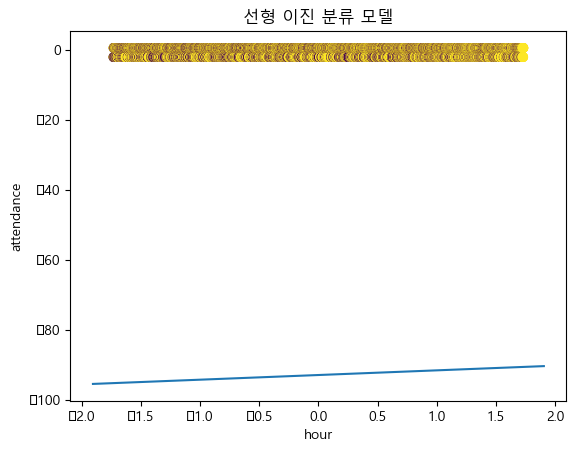

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# 산점도 그리기
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train.values.ravel().astype(int))

# 결정 경계 그리기
xmin, xmax = plt.xlim()
x_plot = np.linspace(xmin, xmax)
coef = logreg.coef_[0]
intercept = logreg.intercept_
y_plot = -(x_plot * coef[0] + intercept) / coef[1]
plt.plot(x_plot, y_plot)

# 그래프 설정
plt.title('선형 이진 분류 모델')
plt.xlabel('hour')
plt.ylabel('attendance')

# 그래프 출력
plt.show()



뭐고이거...

C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0_누적_37
- 0_절대_37
- 10_누적_37
- 10_절대_37
- 11_누적_37
- ...
Feature names seen at fit time, yet now missing:
- 0_누적_15
- 0_절대_15
- 10_누적_15
- 10_절대_15
- 11_누적_15
- ...

  warnings.warn(message, FutureWarning)
C:\Users\thkkk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5999587267192901
Predicted Probabilities: [[0.7664556  0.2335444 ]
 [0.48158213 0.51841787]
 [0.31214126 0.68785874]
 ...
 [0.07238163 0.92761837]
 [0.1047078  0.8952922 ]
 [0.10586766 0.89413234]]
[0 1 1 1 0]


C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


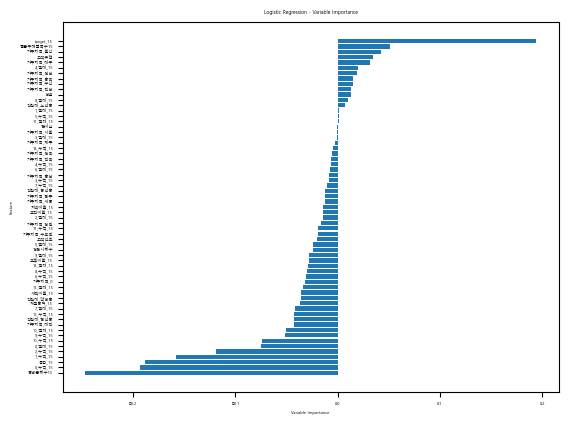

In [91]:
# 테스트 데이터셋으로 모델 평가
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

# Evaluation - Accuracy
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Evaluation - Predicted Probabilities
predicted_probabilities = logreg.predict_proba(X_test_scaled)
print("Predicted Probabilities:", predicted_probabilities)

# Variable Importance Visualization
importance = logreg.coef_[0]
feature_names = dataset.columns  # Replace with your feature names
sorted_indices = importance.argsort()

predicted_class = logreg.predict(X_test_scaled)
print(predicted_class[0:5])

plt.barh(range(len(importance)), importance[sorted_indices])
plt.yticks(range(len(importance)), feature_names[sorted_indices])
plt.xlabel("Variable Importance")
plt.ylabel("Feature")
plt.title("Logistic Regression - Variable Importance")
plt.show()

In [29]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression()

# MultiOutputClassifier로 다중 레이블 분류 모델 생성
multi_logreg = MultiOutputClassifier(logreg)

# 모델 학습
multi_logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = multi_logreg.score(X_validation_scaled, y_validation)


In [17]:
import matplotlib.pyplot as plt

# 학습 데이터와 검증 데이터에 대한 정확도 계산
train_accuracy = logreg.score(X_train_scaled, y_train)
validation_accuracy = logreg.score(X_validation_scaled, y_validation)

# 그래프 그리기
epochs = range(1, n_epochs + 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


NameError: name 'n_epochs' is not defined

ValueError: x and y must have same first dimension, but have shapes (19383,) and (1,)

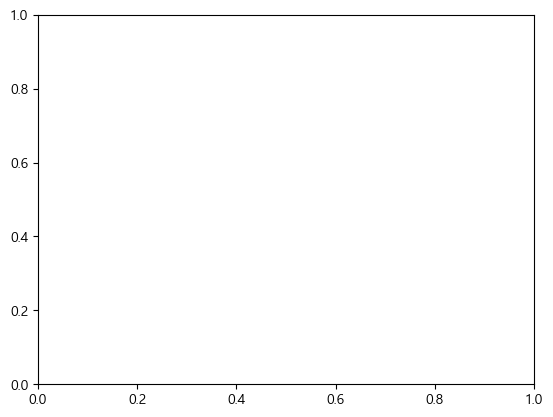

In [18]:
# 학습 데이터와 검증 데이터에 대한 정확도 계산
train_accuracy = logreg.score(X_train_scaled, y_train)
validation_accuracy = logreg.score(X_validation_scaled, y_validation)

# 정확도를 1차원으로 변환
train_accuracy = train_accuracy.flatten()
validation_accuracy = validation_accuracy.flatten()

# 그래프 그리기
n_epochs = len(X_train_scaled)
epochs = range(1, n_epochs + 1)

plt.plot(list(epochs), train_accuracy, label='학습 정확도')
plt.plot(list(epochs), validation_accuracy, label='검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.title('학습 및 검증 정확도')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (19383,) and (1,)

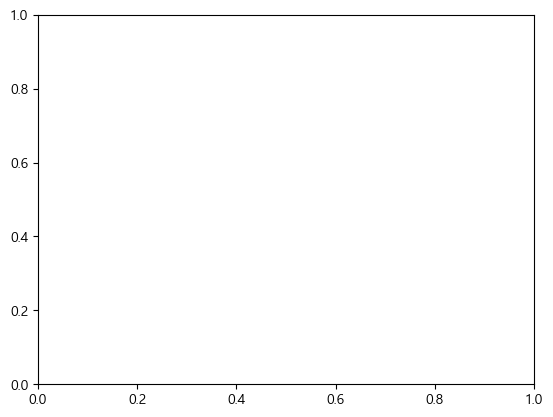

In [19]:
# 학습 데이터와 검증 데이터에 대한 정확도 계산
train_accuracy = logreg.score(X_train_scaled, y_train)
# 학습 데이터와 검증 데이터에 대한 정확도 계산
train_accuracy = logreg.score(X_train_scaled, y_train)
validation_accuracy = logreg.score(X_validation_scaled, y_validation)

# 정확도를 1차원으로 변환
train_accuracy = train_accuracy.flatten()
validation_accuracy = validation_accuracy.flatten()

# 그래프 그리기
n_epochs = len(X_train_scaled)
epochs = range(1, n_epochs + 1)

plt.plot(list(epochs), train_accuracy, label='학습 정확도')
plt.plot(list(epochs), validation_accuracy, label='검증 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.title('학습 및 검증 정확도')
plt.legend()
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier()

# 랜덤 포레스트 모델 학습
rf.fit(X_train, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = rf.score(X_validation, y_validation)

# 테스트 데이터셋으로 모델 평가
test_accuracy = rf.score(X_test, y_test)


In [ ]:
# 위에걸 이제 둘다 ss를 대입 <- 먼져해야하긴함
# 하이퍼파라미터 이용해주고

In [7]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train) # 1-5분기 로지스틱 회귀 분류학습

pred = lr_clf.predict(X_valid) # 6분기 증감 예측 학습
mse = mean_squared_error(y_valid, pred) #  
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))

NameError: name 'LogisticRegression' is not defined

In [ ]:
lr_clf.fit(X_train , y_train)

In [ ]:
coefficients = lr_clf.coef_
intercept = lr_clf.intercept_

# 변수 중요도 출력
for feature, coef in zip(features, coefficients[0]):
    print(f'{feature}: {coef}')

In [ ]:
# 앙상블 학습~ 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators = [('LR',lr_clf), ('KNN', knn_clf)], voting = 'soft')



vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

lr_clf.fit(X_train , y_train)
pred_lr = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test , pred_lr)
print('LogisticRegression 분류기 정확도: ' ,round(lr_accuracy,4))
knn_clf.fit(X_train , y_train)
pred_knn = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test , pred_knn)
print('KNeighborsClassifier:' , round(knn_accuracy,4))

In [ ]:
df2.info() 

In [27]:

lr_clf = LogisticRegression(max_iter = 50 , random = 200,X_train , y_train)



SyntaxError: positional argument follows keyword argument (495044402.py, line 1)

### penalty: 규제 유형 설정 (l1, l2)
### -> l1: L1 규제 적용
### -> l2: L2 규제 적용
### solver: 회귀 계수 최적화 방식 지정
### -> 이전에는 libnear가 기본, 지금은 lbfgs가 기본
### -> lbfgs: 메모리 공간 절약, CPU 코어 수 많으면 최적화를 병렬로 수행
### -> liblinear: 다차원이고 작은 데이터 세트에서 효과적으로 동작
### -> 국소 최적화 (Local Minimum) 이슈 있음
### -> 병렬로 최적화 불가
### -> 그외 newtron-cg, sag, saga 있는데 성능에 큰 차이 없어서 변경할 일 없음
### C: 규제 강도 조절
### -> α의 역수
### -> 그러니까 작을수록 규제 강도가 큼

penalty='l2', C=0.1, solver='liblinear', max_iter=200

L1 규제는 모델의 가중치 벡터의 L1 노름을 규제 항으로 추가하는 방식입니다. 이는 일부 가중치를 정확히 0으로 만들어 특성 선택(feature selection)을 수행하는 효과가 있습니다. L1 규제는 희소성을 가진 모델을 유도하며, 중요한 특성을 강조하여 모델의 해석력을 향상시킵니다.

L2 규제는 모델의 가중치 벡터의 L2 노름을 규제 항으로 추가하는 방식입니다. 이는 모든 가중치를 골고루 작게 만들어 모델의 과적합을 완화하는 효과가 있습니다. L2 규제는 일반적으로 기본적으로 사용되는 규제 방식이며, 가중치 감쇠(weight decay)라고도 불립니다.

# L1 규제를 적용한 로지스틱 회귀 모델 생성
logreg_l1 = LogisticRegression(penalty='l1')

# L2 규제를 적용한 로지스틱 회귀 모델 생성
logreg_l2 = LogisticRegression(penalty='l2')

In [ ]:
L2박고 = 과적합 최소화 

https://github.com/bnv20/project_cakd1/blob/main/1%EC%B0%A8/1%ED%8C%80/%ED%95%99%EC%8A%B5_%ED%8F%89%EA%B0%80-Logistic%20Regression.ipynb

위의 결과는 OLS(Ordinary Least Squares) 회귀 모델의 결과를 보여줍니다. 이 결과를 통해 모델의 성능 및 통계적 유의성을 평가할 수 있습니다.

여기서 주목해야 할 몇 가지 통계적 지표는 다음과 같습니다:

Adj. R-squared (수정된 R 제곱값): 이 값은 모델이 종속 변수의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다. 값이 0에 가까울수록 모델의 설명력이 낮고, 1에 가까울수록 높은 설명력을 가집니다.

AIC (Akaike Information Criterion): AIC는 모델의 상대적인 품질을 평가하는 지표로, 낮을수록 좋은 모델입니다. AIC는 모델의 적합도와 복잡성을 고려하여 계산됩니다.

BIC (Bayesian Information Criterion): BIC는 AIC와 유사한 목적으로 사용되는 지표로, AIC와 마찬가지로 낮을수록 좋은 모델입니다.

F-statistic (F-통계량) 및 Prob (F-statistic): F-통계량은 회귀 모델의 유의성을 평가하는 지표입니다. Prob (F-statistic)는 F-통계량에 대한 p-value를 나타내며, 이 값이 작을수록 모델의 유의성이 높습니다.

Coef. (회귀 계수): 각 독립 변수의 회귀 계수와 해당 계수의 표준 오차를 보여줍니다. 회귀 계수는 해당 독립 변수가 종속 변수에 미치는 영향을 나타내며, 표준 오차는 추정된 회귀 계수의 불확실성을 나타냅니다. P>|t| 값은 해당 계수의 통계적 유의성을 평가하는데 사용되며, 작을수록 해당 계수가 유의미한 영향을 가진다는 것을 의미합니다.

Omnibus, Jarque-Bera: 이러한 검정은 오차 항의 정규성을 평가하는 지표입니다. Omnibus는 정규성을 평가하는데 사용되는 검정 통계량이며, Jarque-Bera는 정규성을 평가하는데 사용되는 다른 검정 통계량입니다. 이러한 검정의 p-value가 낮을수록 오차 항이 정규성을 가지지 않음을 의미할 수 있습니다.

Durbin-Watson: Durbin-Watson 통계량은 오차 항 사이의 자기상관을 평가하는 지표입니다. 값이 2에 가까울수록 자기상관이 없다고 가정할 수 있습니다.

마지막으로, "The condition number is large (2e+05). This might indicate strong multicollinearity or other numerical problems."라는 경고 메시지가 나타납니다. 이는 모델에 다중공선성(multicollinearity) 또는 다른 수치적인 문제가 있을 수 있다는 것을 나타냅니다. 다중공선성은 독립 변수들 간에 높은 상관 관계가 있는 경우 발생할 수 있으며, 이는 회귀 모델의 안정성을 저해할 수 있습니다. 이 문제를 해결하기 위해서는 독립 변수들 간의 상관 관계를 평가하고, 필요에 따라 변수를 선택하거나 변형하는 등의 조치를 취할 수 있습니다.

독립 변수 간의 상관 관계가 높을 때 어떤 변수를 제거할지 결정하는 기준은 주관적이며 분석의 목적과 도메인 지식에 따라 다를 수 있습니다. 그러나 다음과 같은 일반적인 기준을 고려할 수 있습니다:

상관 계수의 크기: 상관 계수의 절대값이 높을수록 두 변수 간의 선형 관계가 강하다는 의미입니다. 일반적으로 0.7 이상의 큰 상관 계수를 가진 변수 쌍을 상관이 높은 변수로 간주할 수 있습니다. 상관 계수는 -1에서 1까지의 값을 가지며, 1에 가까울수록 양의 선형 관계가 강하고, -1에 가까울수록 음의 선형 관계가 강합니다.

변수의 중요성: 변수의 중요성은 해당 변수가 종속 변수에 대해 얼마나 중요한 예측 요소인지를 나타냅니다. 중요한 변수는 분석 목적에 맞게 보다 해석 가능하고 유의미한 결과를 제공할 수 있습니다.

도메인 지식: 도메인 지식은 해당 분야에 대한 전문적인 지식을 의미합니다. 도메인 지식을 활용하여 상관 관계가 높은 변수 중에서 중요하다고 여겨지는 변수를 선택할 수 있습니다.

다중공선성: 다중공선성은 독립 변수 간에 높은 상관 관계가 있는 경우 발생할 수 있습니다. 다중공선성이 높은 변수는 모델의 안정성을 저해할 수 있으므로, 다중공선성을 고려하여 변수를 선택하거나 제거할 수 있습니다.

상관 관계가 높은 변수를 제거하기 전에는 변수의 중요성과 도메인 지식을 고려하여 어떤 변수를 제거해야 하는지 신중하게 판단해야 합니다. 또한, 다중공선성을 평가하여 변수 선택 또는 조정을 수행하는 것이 모델의 안정성을 향상시키는 데 도움이 됩니다.